## Environment setup

### Library preparation

In [113]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
from si_prefix import si_format
from tqdm import tqdm, tqdm_notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import qcodes as qc
# from qcodes import Station, load_by_run_spec, load_by_guid
# from qcodes.instrument.base import Instrument
# from qcodes.dataset.experiment_container import (Experiment,
#                                                  load_last_experiment,
#                                                  new_experiment)
# from qcodes.dataset.database import initialise_database
# from qcodes.dataset.measurements import Measurement
# from qcodes.dataset.plotting import plot_by_id, get_data_by_id, plot_dataset
# from qcodes.dataset.data_set import load_by_id
# # from qcodes.dataset.data_export import get_shaped_data_by_runidb

In [115]:
from qcodes.instrument_drivers.Lakeshore.Model_372 import Model_372
# from qcodes.instrument_drivers.tektronix.AWG3252_Isrc import AWG3252_Isrc
from qcodes.instrument_drivers.HP.HP34401 import HP34401
from qcodes.instrument_drivers.HP.HP34401_DL1201 import HP34401_DL1201
from qcodes.instrument_drivers.Keithley.Keithley_2600_channels import *
from qcodes.instrument_drivers.tektronix.AWG5204_Isrc import AWG5204_Isrc

from qcodes.instrument_drivers.Keithley.Keithley_213 import K213


# from qcodes.instrument_drivers.Keysight.Keysight_B2962A_Isrc import B2962A_Isrc


from qcodes.instrument_drivers.Keithley.Keithley_6220 import Keithley_6220
from qcodes.instrument_drivers.Keithley.Keithley_6220_Isrc import Keithley_6220_Isrc

In [116]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df

from JJformulas import *
# from meas_util import *

from JJmeasurement import *

### Instrument nicknames and QC database initialization

In [119]:
try:
   Instrument.close_all()
except KeyError:
   pass    
except NameError:
   pass 

K2602 =  Keithley_2600(name = 'K2602', address = "GPIB::26::INSTR" )
Flux_chA = K2602.smua.curr
Flux_chB = K2602.smub.curr

Bfield =  Flux_chA
Bfield.step = 10e-6
Bfield.inter_delay = .1



# Isrc = AWG5204_Isrc('gen', 'TCPIP0::AWG52000-XXXX::inst0::INSTR', ch = 1, R_bias = 1e9, Attn = 1, timeout = 20)


# Isrc = Keithley_6220(name = 'K6220', address = "GPIB::13::INSTR" )
# Isrc.set_R_Attn ( R_bias = 1, Attn = 1 )




# Isrc = AWG3252_Isrc('gen', 'TCPIP0::192.168.13.32::inst0::INSTR', 
#                     R_bias = 1e9, Attn = 10)
# Isrc.init()

Vmeter = HP34401_DL1201('meter', 'GPIB0::8::INSTR', Gain = 1e2)
Vmeter.init('fast 6')


# Isrc = Keithley_6220_Isrc(name = 'K6220', address = "GPIB::13::INSTR",
#                           Rsh = 10e6, Rb = 1e9, Vmeter = Vmeter)


Isrc = Keithley_6220_Isrc(name = 'K6220', address = "GPIB::13::INSTR",
                          Rsh = 10.041e3, Rb = 2.2e6, Vmeter = Vmeter)


station = qc.Station(Isrc, Vmeter, Bfield)

print ('Instrument initialization completed.')

Connected to: Keithley Instruments Inc. 2602A (serial:1272049, firmware:2.1.5) in 0.16s


[K6220(Keithley_6220_Isrc)] Snapshot: Could not update parameter: Irange


Instrument initialization completed.


In [6]:

LS370 = Model_372(name = 'LS370 input Ch', address = 'GPIB::12::INSTR', terminator='\n')
T8 = LS370.ch08.temperature

htr = LS370.sample_heater
htr_setpt = htr.setpoint

htr_setpt.set(0.020)
htr.P.set(30)
htr.I.set(5)
htr.D.set(1)
# PIDset(30,5,1)
htr.output_range('3.16mA')

Connected to: LSCI 370 (serial:370665, firmware:04102008) in 0.11s


In [7]:
Vgate = K213(name = 'Vgate', address = 'GPIB::3::INSTR')

In [8]:
Vg = Vgate.voltage

### Class JJmeas

In [126]:
tools = {'I' : Isrc.I,
         'V' : Vmeter.V,
         'B' : Flux_chA,
         'T': T8,
         'htr' : htr_setpt}

In [127]:
def setup():
    Isrc.I.set(0)
#     pass

def cleanup():
    Isrc.I.set(0) 
#     Bfield.set(0)



In [128]:
jj = JJmeas(sample = 'D055B1N5v1', tools = tools)
jj.setup = setup
jj.cleanup = cleanup

# jj.ZF   = -2e-3
# jj.FF   = 0.200e-3

In [20]:
Isrc.I.set(0)

In [ ]:
# jj4 = JJmeas(sample = 'D055B1N4v1', tools = tools)
# jj4.setup = setup
# jj4.cleanup = cleanup


# jj5 = JJmeas(sample = 'D070B1N5v1', tools = tools)
# jj5.setup = setup
# jj5.cleanup = cleanup
# jj5.ZF   = -2e-6
# jj5.FF   = 220e-6

# jj0 = JJmeas(sample = 'D070B1N0v1', tools = tools)
# jj0.setup = setup
# jj0.cleanup = cleanup
# jj0.ZF   = -2e-6
# jj0.FF   = 220e-6

In [ ]:
# jj = JJmeas(sample = 'D078N5v1', tools = tools)
# jj.setup = setup
# jj.cleanup = cleanup

In [ ]:
jj.tool_status(['B', 'I'])

In [ ]:
#values without extra shield

# jj.ZF   = -0.093e-3
# jj.FF   = 0.130e-3

## Measurement

In [26]:
jj.tools['I'].set(0e-12)

In [ ]:
tools['I'].get()

#### Iscr choise

In [147]:
Isrc.ask_raw('SOUR:CURR:RANG?')

'2.000000E-06\n'

In [164]:
Isrc.write_raw('SOUR:CURR:RANG 1e-7')# -4 for full scan (300nA, -6 or -7 for fine scan ~200pA)
Isrc.I.set(0.0e-9)

In [ ]:
Isrc.I.set(0e-9)

#### Vmeter regime

In [ ]:
Vmeter.init('fast 6')

In [ ]:
jj.meas_Voffset(0)

In [ ]:
jj.tools['V'].meas_Voff()
Isrc.Vmeter.Voff

In [ ]:
B = jj.cos_to_B(1)

print(B*1e3)

Bfield.set(B)


### IVCs

In [ ]:
jj.stabilize_I( amp = 200e-12)

#### wide scan

In [132]:
#B = jj.cos_to_B(0)

B = 0

print(B*1e3)

Bfield.set(B)


jj.IVC_udu (amp = 300e-9, stp = 1e-9, dt = .1,  N_avg = 1, 
            label = 'kei full ivc')

0.0


Starting experimental run with id: 286


An exception occured in measurement with guid: aaaaaaaa-0000-0000-0000-01740836d129;
Traceback:
Traceback (most recent call last):
  File "..\..\_jjtools\JJmeasurement.py", line 84, in IVC_cust
    is_vs = [[I.get(),V.get()] for _ in range( N_avg)]
  File "..\..\_jjtools\JJmeasurement.py", line 84, in <listcomp>
    is_vs = [[I.get(),V.get()] for _ in range( N_avg)]
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\instrument\parameter.py", line 452, in get_wrapper
    value = self.get_parser(value)
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\instrument_drivers\Keithley\Keithley_6220_Isrc.py", line 91, in get_I
    v = self.Vmeter.V.get() - Voff
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\instrument\parameter.py", line 448, in get_wrapper
    value = get_function(*args, **kwargs)
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\utils\command.py", line 178, in __call__
    return self.exec_function(*args)
  File "C:\Users\

KeyboardInterrupt: 

#### fine scan

In [129]:
jj.tools['V'].get()

5.7554249999999995e-05

In [76]:
jj.tools['I'].set(0e-12)

In [130]:
# B = jj5.cos_to_B(0.25)
B = 0e-3
# v = 0


print(B*1e3)

Bfield.set(B)
# Vg.set(v)


jj.IVC_udu (amp = 300e-12, stp = 1e-12, dt = .1,  N_avg = 1, 
            label = 'kei fine scan B = 0m ')

0.0


Starting experimental run with id: 285


An exception occured in measurement with guid: aaaaaaaa-0000-0000-0000-0174082e3d5c;
Traceback:
Traceback (most recent call last):
  File "..\..\_jjtools\JJmeasurement.py", line 84, in IVC_cust
    is_vs = [[I.get(),V.get()] for _ in range( N_avg)]
  File "..\..\_jjtools\JJmeasurement.py", line 84, in <listcomp>
    is_vs = [[I.get(),V.get()] for _ in range( N_avg)]
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\instrument\parameter.py", line 452, in get_wrapper
    value = self.get_parser(value)
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\instrument_drivers\Keithley\Keithley_6220_Isrc.py", line 91, in get_I
    v = self.Vmeter.V.get() - Voff
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\instrument\parameter.py", line 448, in get_wrapper
    value = get_function(*args, **kwargs)
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\utils\command.py", line 178, in __call__
    return self.exec_function(*args)
  File "C:\Users\

KeyboardInterrupt: 

In [89]:
imin = 150e-12
imax = 815e-12

i_list =   np.concatenate ([np.linspace(0    , imax, 21), 
                            np.linspace(imax, imin, 21),
                            np.linspace(imin, imax, 251),
                            np.linspace(imax,  0e-12, 21)]) 

jj.IVC_cust ( i_list, dt = 0.1, N_avg = 1, label = 'B=0m intermid steps')

Starting experimental run with id: 34


34

### Ic meas

In [ ]:
B = 0e-6
Bfield.set(B)

i_list = np.linspace(0, 200e-12, 101)

jj.IVC_cust (i_list, Vthr = 30e-6, dt = 0.1,
             N_avg = 1, label = 'Kei Ic highRb RT cos = 1')

### Time scan

In [ ]:
# Bfield.set(0e-3)
jj.time_scan ( tools['I'], dur = 30, dt= 0.1)

In [ ]:
B_list = np.linspace(0e-3, .3e-3, 51)

[            jj.time_scan ( tools['V'], dur = 1, dt= 0.01)
for jj in    jj.Bscan( B_list = B_list )]

### IVC B

#### New syntaxis to try

In [201]:
 len(np.linspace(-3.5e-3, -.1e-3, 18))

18

In [65]:
jj.tools['I'].set(0)

In [92]:
# B_list = udu_list ( 4e-3, 0.2e-3)
B_list = np.linspace(-1e-3, 4e-3, 201)
# B_list = [0]*500
# # cos_list = np.linspace(1,0, 26)


# jj = jj1
ids = \
[            jj.IVC_udu (amp = 600e-12, stp = 10e-12, dt = .1,
                         N_avg = 1, label = 'Bscan')
for jj in    jj.Bscan( B_list = B_list )]
# for jj in    jj.Bscan( cos_list = cos_list )]


Bfield.set(0)


Starting experimental run with id: 335


Starting experimental run with id: 336


Starting experimental run with id: 337


Starting experimental run with id: 338


Starting experimental run with id: 339


Starting experimental run with id: 340


Starting experimental run with id: 341


Starting experimental run with id: 342


Starting experimental run with id: 343


Starting experimental run with id: 344


Starting experimental run with id: 345


Starting experimental run with id: 346


Starting experimental run with id: 347


Starting experimental run with id: 348


Starting experimental run with id: 349


Starting experimental run with id: 350


Starting experimental run with id: 351


Starting experimental run with id: 352


Starting experimental run with id: 353


Starting experimental run with id: 354


Starting experimental run with id: 355


Starting experimental run with id: 356


Starting experimental run with id: 357


Starting experimental run with id: 358


Starting experimental run with id: 359


Starting experimental run with id: 360


Starting experimental run with id: 361


Starting experimental run with id: 362


Starting experimental run with id: 363


Starting experimental run with id: 364


Starting experimental run with id: 365


Starting experimental run with id: 366


Starting experimental run with id: 367


Starting experimental run with id: 368


Starting experimental run with id: 369


Starting experimental run with id: 370


Starting experimental run with id: 371


Starting experimental run with id: 372


Starting experimental run with id: 373


Starting experimental run with id: 374


Starting experimental run with id: 375


Starting experimental run with id: 376


Starting experimental run with id: 377


Starting experimental run with id: 378


Starting experimental run with id: 379


Starting experimental run with id: 380


Starting experimental run with id: 381


Starting experimental run with id: 382


Starting experimental run with id: 383


Starting experimental run with id: 384


Starting experimental run with id: 385


Starting experimental run with id: 386


Starting experimental run with id: 387


Starting experimental run with id: 388


Starting experimental run with id: 389


Starting experimental run with id: 390


Starting experimental run with id: 391


Starting experimental run with id: 392


Starting experimental run with id: 393


Starting experimental run with id: 394


Starting experimental run with id: 395


Starting experimental run with id: 396


Starting experimental run with id: 397


Starting experimental run with id: 398


Starting experimental run with id: 399


Starting experimental run with id: 400


Starting experimental run with id: 401


Starting experimental run with id: 402


Starting experimental run with id: 403


Starting experimental run with id: 404


Starting experimental run with id: 405


Starting experimental run with id: 406


Starting experimental run with id: 407


Starting experimental run with id: 408


Starting experimental run with id: 409


Starting experimental run with id: 410


Starting experimental run with id: 411


Starting experimental run with id: 412


Starting experimental run with id: 413


Starting experimental run with id: 414


Starting experimental run with id: 415


Starting experimental run with id: 416


Starting experimental run with id: 417


Starting experimental run with id: 418


Starting experimental run with id: 419


Starting experimental run with id: 420


Starting experimental run with id: 421


Starting experimental run with id: 422


Starting experimental run with id: 423


Starting experimental run with id: 424


Starting experimental run with id: 425


Starting experimental run with id: 426


Starting experimental run with id: 427


Starting experimental run with id: 428


Starting experimental run with id: 429


Starting experimental run with id: 430


Starting experimental run with id: 431


Starting experimental run with id: 432


Starting experimental run with id: 433


Starting experimental run with id: 434


Starting experimental run with id: 435


Starting experimental run with id: 436


Starting experimental run with id: 437


Starting experimental run with id: 438


Starting experimental run with id: 439


Starting experimental run with id: 440


Starting experimental run with id: 441


Starting experimental run with id: 442


Starting experimental run with id: 443


Starting experimental run with id: 444


Starting experimental run with id: 445


Starting experimental run with id: 446


Starting experimental run with id: 447


Starting experimental run with id: 448


Starting experimental run with id: 449


Starting experimental run with id: 450


Starting experimental run with id: 451


Starting experimental run with id: 452


Starting experimental run with id: 453


Starting experimental run with id: 454


Starting experimental run with id: 455


Starting experimental run with id: 456


Starting experimental run with id: 457


Starting experimental run with id: 458


Starting experimental run with id: 459


Starting experimental run with id: 460


Starting experimental run with id: 461


Starting experimental run with id: 462


Starting experimental run with id: 463


Starting experimental run with id: 464


Starting experimental run with id: 465


Starting experimental run with id: 466


Starting experimental run with id: 467


Starting experimental run with id: 468


Starting experimental run with id: 469


Starting experimental run with id: 470


Starting experimental run with id: 471


Starting experimental run with id: 472


Starting experimental run with id: 473


Starting experimental run with id: 474


Starting experimental run with id: 475


Starting experimental run with id: 476


Starting experimental run with id: 477


Starting experimental run with id: 478


Starting experimental run with id: 479


Starting experimental run with id: 480


Starting experimental run with id: 481


Starting experimental run with id: 482


Starting experimental run with id: 483


Starting experimental run with id: 484


Starting experimental run with id: 485


Starting experimental run with id: 486


Starting experimental run with id: 487


Starting experimental run with id: 488


Starting experimental run with id: 489


Starting experimental run with id: 490


Starting experimental run with id: 491


Starting experimental run with id: 492


Starting experimental run with id: 493


Starting experimental run with id: 494


Starting experimental run with id: 495


Starting experimental run with id: 496


Starting experimental run with id: 497


Starting experimental run with id: 498


Starting experimental run with id: 499


Starting experimental run with id: 500


Starting experimental run with id: 501


Starting experimental run with id: 502


Starting experimental run with id: 503


Starting experimental run with id: 504


Starting experimental run with id: 505


Starting experimental run with id: 506


Starting experimental run with id: 507


Starting experimental run with id: 508


Starting experimental run with id: 509


Starting experimental run with id: 510


Starting experimental run with id: 511


Starting experimental run with id: 512


Starting experimental run with id: 513


Starting experimental run with id: 514


Starting experimental run with id: 515


Starting experimental run with id: 516


Starting experimental run with id: 517


Starting experimental run with id: 518


Starting experimental run with id: 519


Starting experimental run with id: 520


Starting experimental run with id: 521


Starting experimental run with id: 522


Starting experimental run with id: 523


Starting experimental run with id: 524


Starting experimental run with id: 525


Starting experimental run with id: 526


Starting experimental run with id: 527


Starting experimental run with id: 528


Starting experimental run with id: 529


Starting experimental run with id: 530


Starting experimental run with id: 531


Starting experimental run with id: 532


Starting experimental run with id: 533


Starting experimental run with id: 534


Starting experimental run with id: 535



<IPython.core.display.Javascript object>


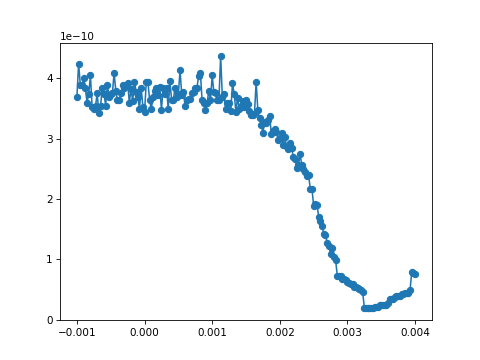

Starting experimental run with id: 536


536

In [94]:
# ids = range(146, 246+1)
# B_list = np.linspace(-3.5e-3,3.5e-3, 101)

Ics = [extract_Isw_R0_by_id (idx, dy = 100e-6)[0] for idx in ids]


fig, ax = plt.subplots()
# ax.plot(cos_list, Ics, 'o-')
ax.plot(B_list, Ics, 'o-')


jj.mock_meas((jj.tools['I'], Ics), (jj.tools['B'], B_list),
             label = 'partial Bscan')

#### Ic(B)

In [ ]:
jj0.ZF

In [ ]:
i_list = np.linspace(0, 100e-12, 201)
# B_list = np.linspace(-1e-3, 1e-3, 201)
cos_list = np.linspace(0.4,0, 11)

jj = jj0

[            jj.IVC_cust ( i_list, Vthr = 50e-6, dt = 0.1, N_avg = 1, label = 'fine Ic(B)')
for jj in    jj.Bscan( cos_list = cos_list )]


Bfield.set(0)

In [ ]:
i_list = np.concatenate([np.linspace(0, 30e-12, 251),
                         np.linspace(30e-12, 0,  251)]) 
B_list = np.linspace(-1e-3, 1e-3, 51)

[            jj.IVC_cust ( i_list, dt = 0.1, N_avg = 1, label = 'test Ic(B)')
for jj in    jj.Bscan( B_list = B_list )]


Bfield.set(0)

In [ ]:
# B_list = udu_list ( 4e-3, 0.2e-3)
B_list = np.linspace(0, 1.85e-3, 11)

i_list = udu_list(1e-12, 0.01e-12) -.25e-12



[            jj.IVC_cust (i_list, dt = .5, N_avg = 4)
for jj in    jj.Bscan( B_list = B_list )]

Bfield.set(0)


In [ ]:
jj.ZF = 0
jj.FF = 1.85e-3
cos_list = [1,0]

[            jj.IVC_fwd (amp = 1e-12, stp = 0.1e-12, dt = .5, Ioff = -.35e-12)
for jj in    jj.Bscan( cos_list = cos_list )]

### Vgate scan

In [13]:
V

NameError: name 'V' is not defined

In [172]:


Vg.set(0)

In [54]:
jj.tools['I'].set( 0)
v = 3

Vg.set(v)


time.sleep(5)

jj.IVC_udu (amp = 50e-9, stp = .5e-9, dt = .1,  N_avg = 1, 
        label = f'kei Vg = {v}')

Starting experimental run with id: 131


An exception occured in measurement with guid: aaaaaaaa-0000-0000-0000-0173eb132a07;
Traceback:
Traceback (most recent call last):
  File "..\..\_jjtools\JJmeasurement.py", line 84, in IVC_cust
    is_vs = [[I.get(),V.get()] for _ in range( N_avg)]
  File "..\..\_jjtools\JJmeasurement.py", line 84, in <listcomp>
    is_vs = [[I.get(),V.get()] for _ in range( N_avg)]
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\instrument\parameter.py", line 448, in get_wrapper
    value = get_function(*args, **kwargs)
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\utils\command.py", line 178, in __call__
    return self.exec_function(*args)
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\utils\command.py", line 127, in call_by_str
    return self.exec_str(self.cmd_str.format(*args))
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\instrument\base.py", line 759, in ask
    answer = self.ask_raw(cmd)
  File "C:\Users\KelvinOX25\Anaconda3\lib\

KeyboardInterrupt: 

In [55]:
V_list = np.linspace(0, 10, 21 )
# V = -7


for V in V_list:
    Vg.set(V)


    jj.IVC_udu (amp = 50e-9, stp = 1e-9, dt = .1,  N_avg = 1, 
            label = f'kei Vg = {V}')

Starting experimental run with id: 132


Starting experimental run with id: 133


Starting experimental run with id: 134


Starting experimental run with id: 135


Starting experimental run with id: 136


An exception occured in measurement with guid: aaaaaaaa-0000-0000-0000-0173eb20a7fd;
Traceback:
Traceback (most recent call last):
  File "..\..\_jjtools\JJmeasurement.py", line 82, in IVC_cust
    time.sleep(dt)
KeyboardInterrupt



KeyboardInterrupt: 

<IPython.core.display.Javascript object>


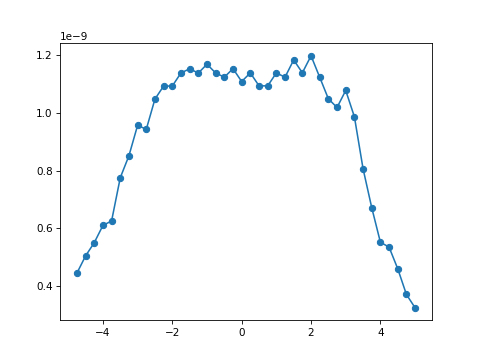

Starting experimental run with id: 100


100

In [43]:
ids = range(58, 98+1)

Ics = [extract_Isw_R0_by_id (idx, dy = 120e-6)[0] for idx in ids]


fig, ax = plt.subplots()

ax.plot(V_list, Ics, 'o-')

jj.mock_meas((jj.tools['I'], Ics), (Vg, V_list),
             label = 'coarse Vscan')

### T scan

In [ ]:
htr.HTRset('3.16mA')

In [ ]:
htr.output_range('3.16mA')

In [ ]:
T8.get()

In [ ]:
B = jj5.cos_to_B(0.2)
# B = 0e-6

print(B*1e3)

Bfield.set(B)

T_list = np.array( [40 + 10*i for i in range (17) ] )*1e-3

[            jj.IVC_udu (amp = 20e-12, stp = 0.2e-12, dt = .1,  N_avg = 1)
 
 for jj in   jj5.Tscan( T_list )]

htr_setpt.set(0.030)

In [ ]:
B = jj5.cos_to_B(0.3)
# B = 0e-6

print(B*1e3)

Bfield.set(B)

T_list = np.array( [40 + 10*i for i in range (17) ] )*1e-3

[            jj.IVC_udu (amp = 20e-12, stp = 0.2e-12, dt = .1,  N_avg = 1)
 
 for jj in   jj5.Tscan( T_list )]

htr_setpt.set(0.030)

In [ ]:
[            jj.IVC_fwd (amp = 1e-12, stp = 0.025e-12, dt = .5, N_avg = 100)
for jj in    jj.Tscan( [200e-3] )]

htr.set(0.030)

In [ ]:
np.array( [40 + 10*i for i in range (17) ] )*1e-3

In [ ]:
htr_setpt.set(30e-3)

In [ ]:
htr.output_range('3.16mA')

In [ ]:
T_list = np.array( [50 + 25*i for i in range (11) ] )*1e-3
B_list = np.linspace(0, 1.85e-3, 11)

for jj in  jj.Tscan( T_list ):
    
    for jj in jj.Bscan(B_list):
    
        jj.IVC_udu (amp = 1e-12, stp = 0.01e-12, dt = .5, Ioff = -.5e-12)
    
    
Bfield.set(0e-3)
htr_setpt.set(30e-3)

In [ ]:
T_list = np.array( [200 + 25*i for i in range (5) ] )*1e-3
B_list = np.linspace(0, 1.85e-3, 11)

for jj in  jj.Tscan( T_list ):
    
    for jj in jj.Bscan(B_list):
    
        jj.IVC_fwd (amp = 2e-12, stp = 0.04e-12, dt = .5, Ioff = -.35e-12)
    
    
Bfield.set(0e-3)
htr_setpt.set(30e-3)

## Snapshot

In [105]:
from pprint import pprint

In [110]:
pprint(station.snapshot())

{'components': {},
 'default_measurement': [],
 'instruments': {},
 'parameters': {'curr': {'__class__': 'qcodes.instrument.parameter.Parameter',
                         'full_name': 'K2602_smua_curr',
                         'instrument': 'qcodes.instrument_drivers.Keithley.Keithley_2600_channels.KeithleyChannel',
                         'instrument_name': 'K2602_smua',
                         'inter_delay': 0.1,
                         'label': 'Current',
                         'name': 'curr',
                         'post_delay': 0,
                         'raw_value': 0.0,
                         'step': 1e-05,
                         'ts': '2020-08-17 14:41:48',
                         'unit': 'A',
                         'value': 0.0}}}


In [101]:
snap=station.snapshot()

In [103]:
snap['instruments']

{'K6220': {'functions': {},
  'submodules': {},
  '__class__': 'qcodes.instrument_drivers.Keithley.Keithley_6220_Isrc.Keithley_6220_Isrc',
  'parameters': {'IDN': {'value': {'vendor': 'KEITHLEY INSTRUMENTS INC.',
     'model': '6220',
     'serial': '1249187',
     'firmware': 'A05  /700x'},
    'ts': '2020-08-13 17:23:49',
    'raw_value': {'vendor': 'KEITHLEY INSTRUMENTS INC.',
     'model': '6220',
     'serial': '1249187',
     'firmware': 'A05  /700x'},
    '__class__': 'qcodes.instrument.parameter.Parameter',
    'full_name': 'K6220_IDN',
    'name': 'IDN',
    'inter_delay': 0,
    'label': 'IDN',
    'unit': '',
    'post_delay': 0,
    'instrument': 'qcodes.instrument_drivers.Keithley.Keithley_6220_Isrc.Keithley_6220_Isrc',
    'instrument_name': 'K6220',
    'vals': '<Anything>'},
   'timeout': {'value': 10.0,
    'ts': '2020-08-18 11:43:55',
    'raw_value': 10.0,
    '__class__': 'qcodes.instrument.parameter.Parameter',
    'full_name': 'K6220_timeout',
    'name': 'timeout

In [ ]:
from JJmeasurement_Plamen import *
import QCmeasurement_Plamen

In [ ]:
jjmock=JJmeas_Pl(sample='mock',tools=tools)

In [ ]:
x=np.linspace(-np.pi,np.pi)
y=np.sin(x)
V=Parameter('V')
I=Parameter('I')
dataset=jjmock.mock_meas_P((V,y),(I,x))

In [ ]:
jjmock.pbi(17)

In [ ]:
dataset1=dataset.snapshot

In [ ]:
dataset2=dataset.snapshot

In [ ]:
from qcodes.utils.metadata import diff_param_values



In [ ]:
diff_param_values(dataset1, dataset2).changed


## Tom's playground

In [134]:
import JJformulas_Tom as jjft

# from JJmeasurement import *
import JJmeasurement_Tom as jjmt
import QCmeasurement_Tom as qcmt

In [136]:
jjt = jjmt.JJmeas(sample = 'D055B1N5v1', tools = tools)
jjt.setup = setup
jjt.cleanup = cleanup



In [145]:
jjt.IVC_udu (amp = 300e-9, stp = 1e-9, dt = .1,  N_avg = 1, 
            label = 'kei full ivc',B_list=[0,1e-3,3e-3])

Starting experimental run with id: 291


291

In [172]:

jjt.IVC_udu (amp = 300e-12, stp = 3e-12, dt = .1,  N_avg = 1, 
            label = 'kei fine scan B = 0m ',B_list=[0,1e-3,3e-3])

Starting experimental run with id: 292


292

In [179]:
#jjt.IVC_cust_BT
Isrc.I.set(0e-9)
#jj.tools['B'].set(0)

In [180]:
Isrc.I.get()
#jj.tools['B'].get()

2.027689169567443e-11

In [140]:
#qc.experiments()
dataset = load_by_run_spec(captured_run_id=287)
#dataset
data = dataset.get_parameter_data()['meter_V']
data
#dataset.get_parameter_data()['Vmeter0_V']

{'meter_V': array([-3.96250000e-08,  1.73446275e-03,  3.69753604e-03,  5.77511565e-03,
         7.53061095e-03,  7.72808025e-03,  7.72592955e-03,  7.71291765e-03,
         7.69939374e-03,  7.67835854e-03,  7.65852974e-03,  7.63925994e-03,
         7.62447454e-03,  7.61243195e-03,  7.60152845e-03,  7.59305784e-03,
         7.58641954e-03,  7.57937654e-03,  7.57366625e-03,  7.56160115e-03,
         7.55412725e-03,  7.54557924e-03,  7.53843955e-03,  7.54907395e-03,
         7.55019554e-03,  7.55845874e-03,  7.57077864e-03,  7.56215064e-03,
         7.56030724e-03,  7.55279835e-03,  7.54831074e-03,  7.54687074e-03,
         7.56477855e-03,  7.59202374e-03,  7.61694075e-03,  7.65457555e-03,
         7.70244374e-03,  7.75970724e-03,  7.81729744e-03,  7.88589054e-03,
         7.94801085e-03,  8.02087905e-03,  8.10237784e-03,  8.19669584e-03,
         8.30228724e-03,  8.40507365e-03,  8.51148934e-03,  8.61648855e-03,
         8.72760315e-03,  8.84113304e-03,  8.96538414e-03,  9.08406725e-03,
 

In [141]:
qc.experiments()[-1]

kei full ivc_#D055B1N5v1#287@C:\Users\KelvinOX25\Documents\GitHub\measDC\!_chains\_expdata\Experiments_D055B1N5v1.db
--------------------------------------------------------------------------------------------------------------------
287-results-1-K2602_smua_curr,K6220_I,meter_V-197